In [1]:
#common imports
import sys
import numpy as np
import pandas as pd

#plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#generate geotagged maps
import folium


In [2]:
#Load data using pandas
insuranceCoverageData = pd.read_csv('aca-states.csv')

In [3]:
#spot check the data
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [4]:
#The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values
insuranceCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
State                                           52 non-null object
Uninsured Rate (2010)                           52 non-null object
Uninsured Rate (2015)                           52 non-null object
Uninsured Rate Change (2010-2015)               52 non-null object
Health Insurance Coverage Change (2010-2015)    52 non-null int64
Employer Health Insurance Coverage (2015)       52 non-null int64
Marketplace Health Insurance Coverage (2016)    52 non-null int64
Marketplace Tax Credits (2016)                  52 non-null int64
Average Monthly Tax Credit (2016)               52 non-null object
State Medicaid Expansion (2016)                 51 non-null object
Medicaid Enrollment (2013)                      50 non-null float64
Medicaid Enrollment (2016)                      52 non-null int64
Medicaid Enrollment Change (2013-2016)          50 non-null float64
Medicare Enrollment (2016)   

In [5]:
#Data cleanup: Rate columns have '%' sign and Credits columns has '$' sign. These should be removed for the analysis.

#Remove % from Rate columns
import re
rateColumns = ['Uninsured Rate (2010)', 'Uninsured Rate (2015)','Uninsured Rate Change (2010-2015)']
for col in rateColumns:
    insuranceCoverageData[col] = insuranceCoverageData[col].apply(lambda x: re.sub('%', '', x))

In [6]:
# Data check
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [7]:
#Remove $ from Tax Credits Column
insuranceCoverageData['Average Monthly Tax Credit (2016)'] = \
insuranceCoverageData['Average Monthly Tax Credit (2016)'].apply(lambda x: x[1: -1])

In [8]:
# Data check
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777


In [9]:
#There are six string attributes. "State" and "State Medicaid Expansion" are descriptive columns. Rest of the columns should be converted to numneric

#Convert object datatypes to numeric
objectColumns = ['Uninsured Rate (2010)', 'Uninsured Rate (2015)','Uninsured Rate Change (2010-2015)', 'Average Monthly Tax Credit (2016)']
for col in objectColumns:
    insuranceCoverageData[col] = pd.to_numeric(insuranceCoverageData[col])

In [10]:
#Data check
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777


In [11]:
# Check that the column  data type is numeric after the transformation
insuranceCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
State                                           52 non-null object
Uninsured Rate (2010)                           52 non-null float64
Uninsured Rate (2015)                           52 non-null float64
Uninsured Rate Change (2010-2015)               52 non-null float64
Health Insurance Coverage Change (2010-2015)    52 non-null int64
Employer Health Insurance Coverage (2015)       52 non-null int64
Marketplace Health Insurance Coverage (2016)    52 non-null int64
Marketplace Tax Credits (2016)                  52 non-null int64
Average Monthly Tax Credit (2016)               52 non-null int64
State Medicaid Expansion (2016)                 51 non-null object
Medicaid Enrollment (2013)                      50 non-null float64
Medicaid Enrollment (2016)                      52 non-null int64
Medicaid Enrollment Change (2013-2016)          50 non-null float64
Medicare Enrollment (2016) 

In [12]:
#Medicaid expansion stats
insuranceCoverageData["State Medicaid Expansion (2016)"].value_counts()

True     32
False    19
Name: State Medicaid Expansion (2016), dtype: int64

In [13]:
#Let’s look at the other fields. The describe() method shows a summary of the numerical attributes
insuranceCoverageData.describe()

,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
count,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,5.000000e+01,5.200000e+01,5.000000e+01,5.200000e+01
mean,14.180769,8.734615,-5.211538,7.479423e+05,6.626615e+06,4.262050e+05,3.611388e+05,292.134615,2.255699e+06,2.828190e+06,6.442463e+05,2.173923e+06
std,4.164087,3.142678,2.649429,2.691466e+06,2.370240e+07,1.538234e+06,1.306590e+06,85.153386,7.945644e+06,1.017933e+07,2.306655e+06,7.855834e+06
min,4.400000,2.800000,-10.300000,1.500000e+04,3.350000e+05,1.331300e+04,1.224000e+03,178.000000,6.751800e+04,6.358300e+04,-3.935000e+03,8.896600e+04
25%,11.250000,6.250000,-6.600000,9.725000e+04,8.797500e+05,5.109700e+04,4.371700e+04,249.500000,2.897750e+05,3.091128e+05,5.397900e+04,3.208870e+05
50%,14.300000,8.650000,-4.900000,2.245000e+05,2.305500e+06,1.306725e+05,9.817550e+04,291.000000,7.946135e+05,9.780525e+05,2.341560e+05,8.187530e+05
75%,17.350000,10.900000,-3.875000,4.122500e+05,4.386500e+06,2.260822e+05,1.936845e+05,310.500000,1.274017e+06,1.732724e+06,4.562492e+05,1.298255e+06
max,23.700000,17.100000,6.100000,1.930400e+07,1.722920e+08,1.108133e+07,9.389609e+06,750.000000,5.639248e+07,7.353293e+07,1.610616e+07,5.714998e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fada2c73160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fada2b0d438>]], dtype=object)

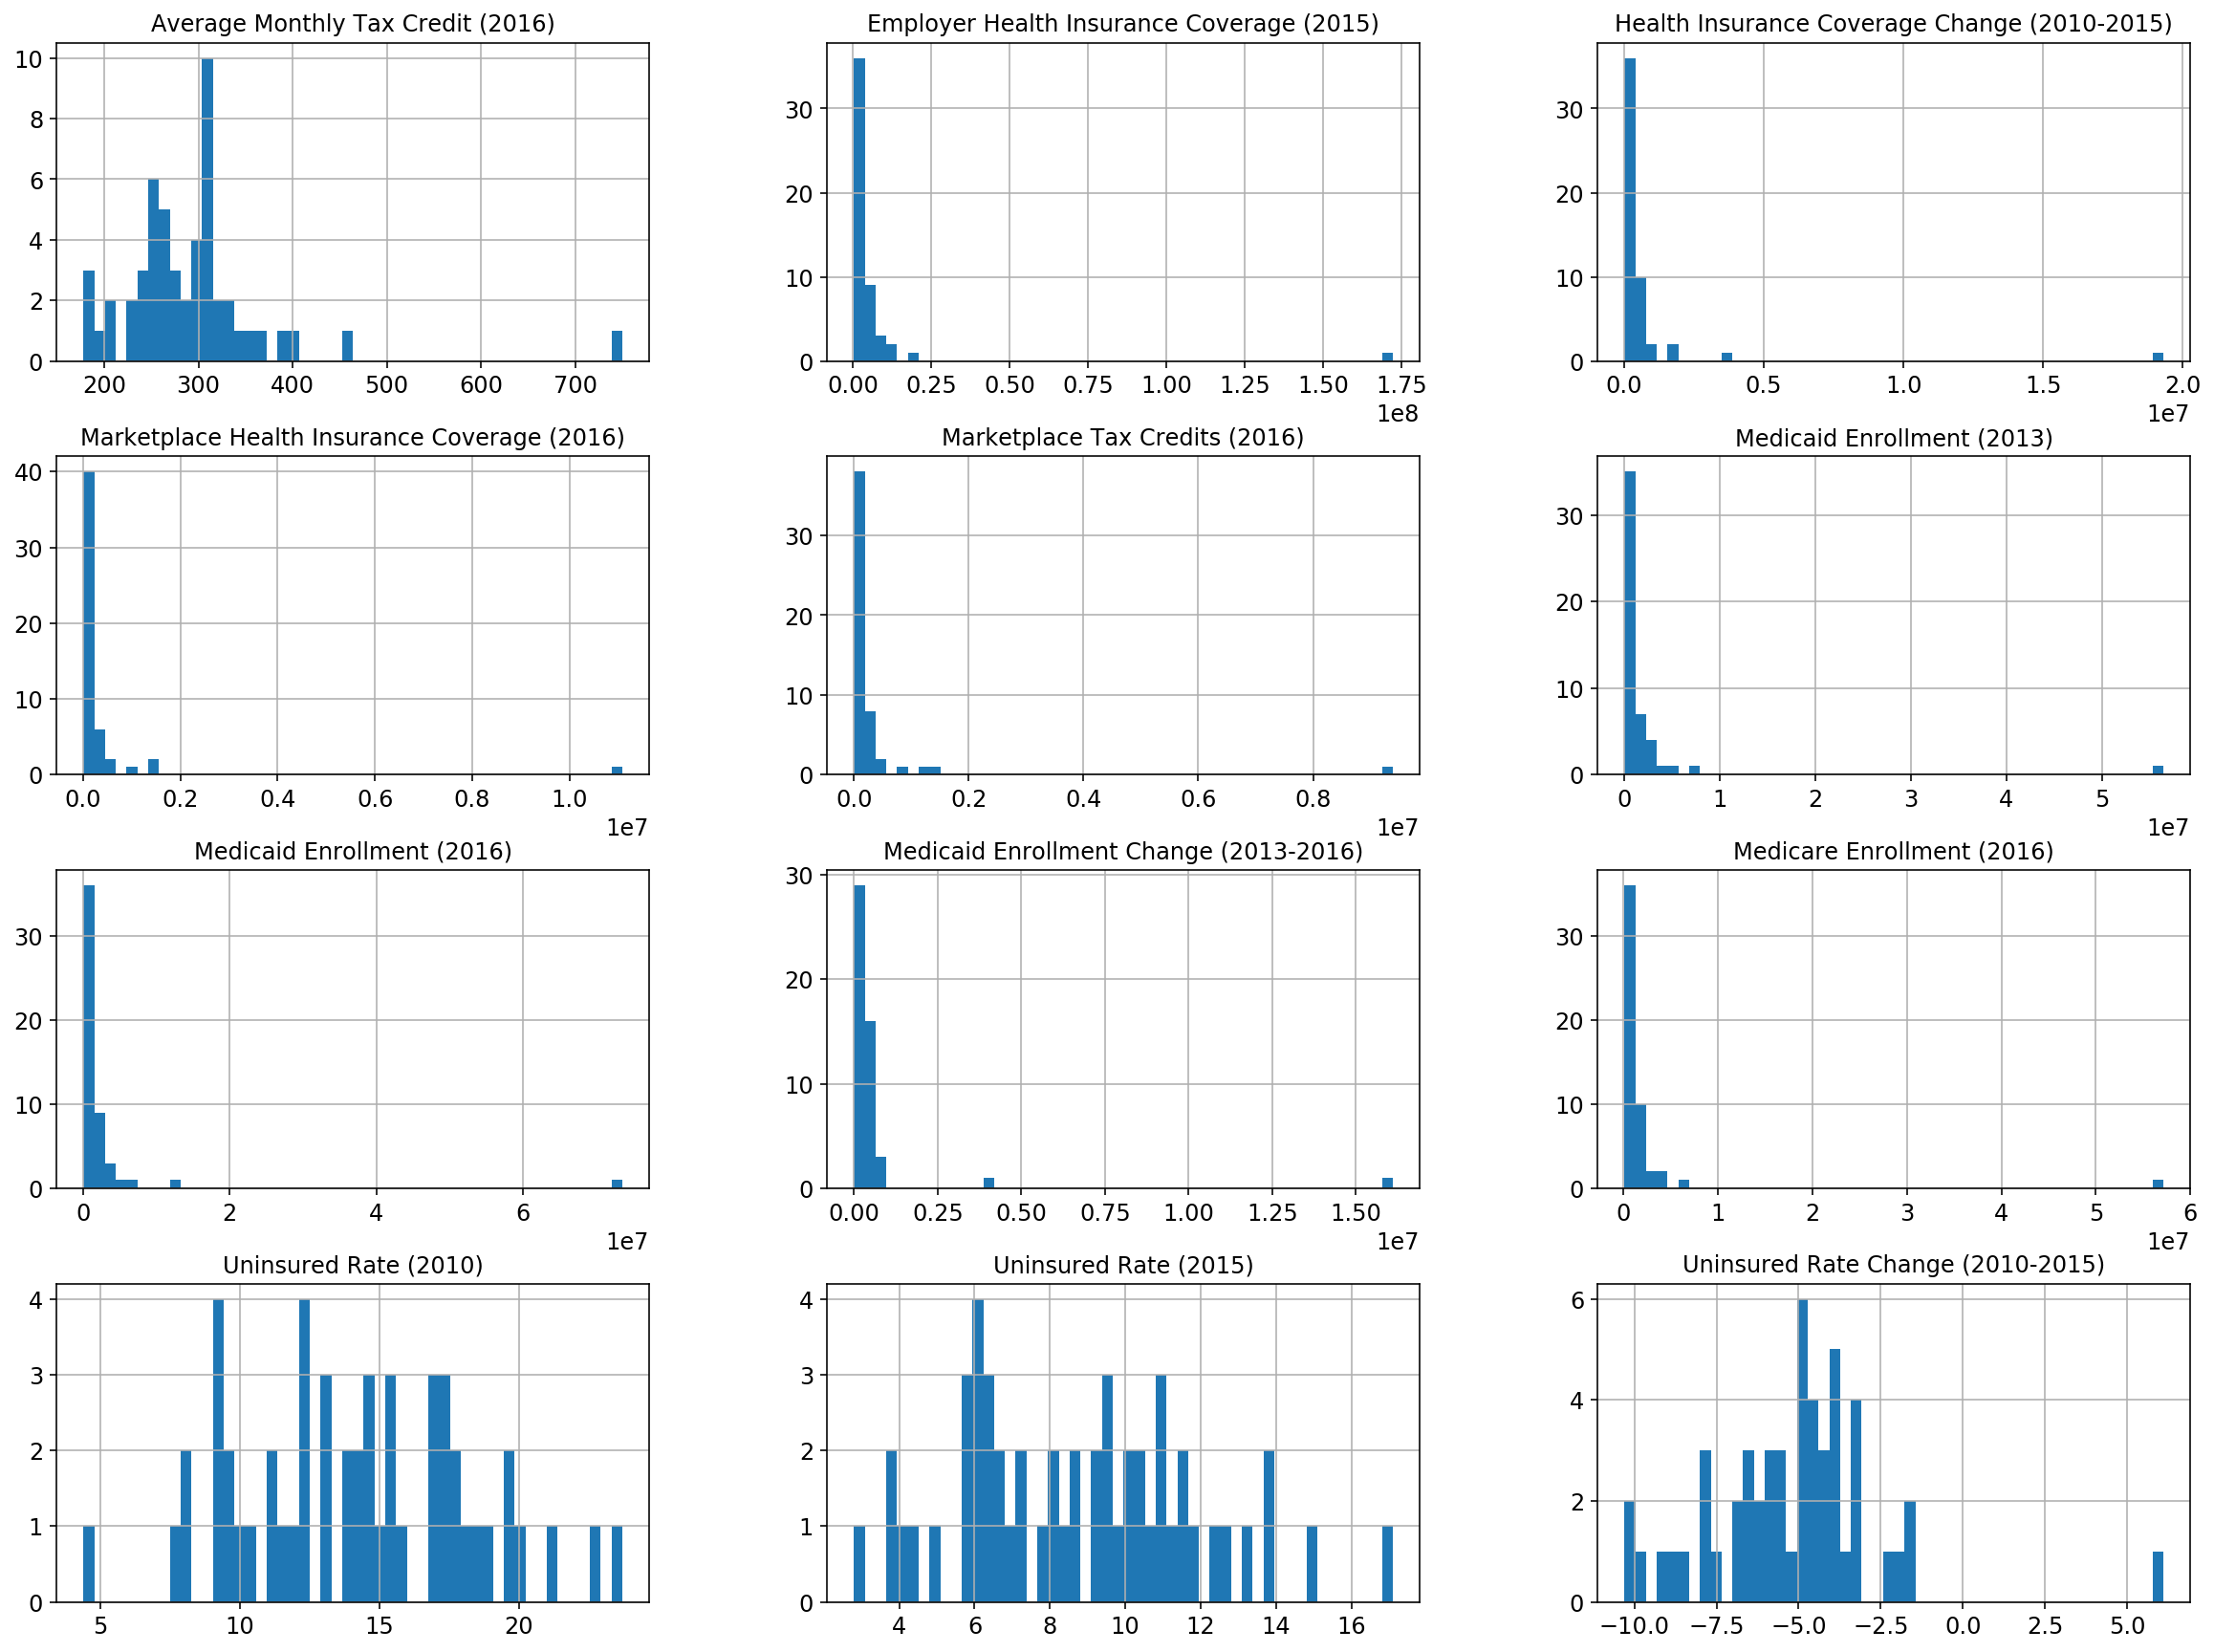

In [14]:
#generate a histogram of the data to observe trends
insuranceCoverageData.hist(bins=50, figsize=(20,15))

In [15]:
#Load state codes
stateCodes = pd.read_csv('state_codes.csv')
stateCodes = stateCodes[['code', 'state']]
stateCodes.columns = ['Code', 'State']

In [16]:
#Data check
stateCodes.head()

,Code,State
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [17]:
#Remove trailing whitespace from state names
insuranceCoverageData.State = insuranceCoverageData.State.apply(lambda x: x.rstrip())

In [18]:
#Merge state code into dataset
insuranceCoverageData = insuranceCoverageData.merge(stateCodes, how='left', on='State')

In [19]:
#check that Code column is added to insuranceCoverageData
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Code
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855,AL
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966,AK
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624,AZ
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146,AR
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777,CA


In [20]:
insuranceCoverageData.tail()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Code
47,Washington,14.2,6.6,-7.6,537000,3986000,158245,110476,238,True,1117576.0,1788536,670960.0,1238649,WA
48,West Virginia,14.6,6.0,-8.6,156000,976000,33235,29163,388,True,354544.0,575645,221101.0,423500,WV
49,Wisconsin,9.4,5.7,-3.7,211000,3521000,224208,190542,332,False,985531.0,1046897,61366.0,1084854,WI
50,Wyoming,14.9,11.5,-3.4,20000,335000,22076,20313,459,False,67518.0,63583,-3935.0,99128,WY
51,United States,15.5,9.4,6.1,19304000,172292000,11081330,9389609,291,NaN,56392477.0,73532931,16106157.0,57149984,NaN


In [21]:
#Remove Null columns from data
insuranceCoverageData = insuranceCoverageData.dropna()

In [22]:
#check all the columns are non-null
insuranceCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 50
Data columns (total 15 columns):
State                                           49 non-null object
Uninsured Rate (2010)                           49 non-null float64
Uninsured Rate (2015)                           49 non-null float64
Uninsured Rate Change (2010-2015)               49 non-null float64
Health Insurance Coverage Change (2010-2015)    49 non-null int64
Employer Health Insurance Coverage (2015)       49 non-null int64
Marketplace Health Insurance Coverage (2016)    49 non-null int64
Marketplace Tax Credits (2016)                  49 non-null int64
Average Monthly Tax Credit (2016)               49 non-null int64
State Medicaid Expansion (2016)                 49 non-null object
Medicaid Enrollment (2013)                      49 non-null float64
Medicaid Enrollment (2016)                      49 non-null int64
Medicaid Enrollment Change (2013-2016)          49 non-null float64
Medicare Enrollment (2016) 

In [24]:
#generate geo maps

#Uninsured Rate 2010 visualization
uninsuredRate2010Map = folium.Map(location=[37, -102], zoom_start=4)
uninsuredRate2010Map.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=insuranceCoverageData,
    columns=['State', 'Uninsured Rate (2010)'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Uninsured Rate (2010) %'
)
folium.LayerControl().add_to(uninsuredRate2010Map)

uninsuredRate2010Map.save('uninsuredrate2010.html')

In [25]:
#Uninsured Rate 2015 visualization
uninsuredRate2015Map = folium.Map(location=[37, -102], zoom_start=4)
uninsuredRate2015Map.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=insuranceCoverageData,
    columns=['State', 'Uninsured Rate (2015)'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Uninsured Rate (2015) %'
)
folium.LayerControl().add_to(uninsuredRate2015Map)

uninsuredRate2015Map.save('uninsuredrate2015.html')

In [31]:
#Uninsured Rate change visualization
uninsuredRateChangeMap = folium.Map(location=[37, -102], zoom_start=4)
uninsuredRateChangeMap.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=insuranceCoverageData,
    columns=['State', 'Uninsured Rate Change (2010-2015)'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Uninsured Rate Change %'
)
folium.LayerControl().add_to(uninsuredRateChangeMap)

uninsuredRateChangeMap.save('uninsuredratechange.html')

In [34]:
#state medicaid expansion visualization
stateMedicaidExpansionMap = folium.Map(location=[37, -102], zoom_start=4)
stateMedicaidExpansionMap.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=insuranceCoverageData,
    columns=['State', 'State Medicaid Expansion (2016)'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale=None,
    legend_name='State Medicaid Expansion (2016)'
)
folium.LayerControl().add_to(stateMedicaidExpansionMap)

stateMedicaidExpansionMap.save('statemedicaidexpansion.html')

In [35]:
#Create column with the total insured population per state
insuredSumCols = ['Employer Health Insurance Coverage (2015)', 'Employer Health Insurance Coverage (2015)', 'Medicaid Enrollment (2016)', 'Medicare Enrollment (2016)']
insuranceCoverageData['totalInsured'] = insuranceCoverageData[list(insuredSumCols)].sum(axis=1)

In [36]:
#Check for added column
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Code,totalInsured
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855,AL,6990630
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966,AK,1035591
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624,AZ,9467822
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146,AR,4256340
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777,CA,56776858


In [37]:
#check for null entries
insuranceCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 50
Data columns (total 16 columns):
State                                           49 non-null object
Uninsured Rate (2010)                           49 non-null float64
Uninsured Rate (2015)                           49 non-null float64
Uninsured Rate Change (2010-2015)               49 non-null float64
Health Insurance Coverage Change (2010-2015)    49 non-null int64
Employer Health Insurance Coverage (2015)       49 non-null int64
Marketplace Health Insurance Coverage (2016)    49 non-null int64
Marketplace Tax Credits (2016)                  49 non-null int64
Average Monthly Tax Credit (2016)               49 non-null int64
State Medicaid Expansion (2016)                 49 non-null object
Medicaid Enrollment (2013)                      49 non-null float64
Medicaid Enrollment (2016)                      49 non-null int64
Medicaid Enrollment Change (2013-2016)          49 non-null float64
Medicare Enrollment (2016) 

In [38]:
#Calculate the Employer health insurance coverage percent.
insuranceCoverageData['Employer Health Insurance %'] = (insuranceCoverageData['Employer Health Insurance Coverage (2015)']/\
insuranceCoverageData['totalInsured']) *100

In [39]:
#Check the added column
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Code,totalInsured,Employer Health Insurance %
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855,AL,6990630,36.405875
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966,AK,1035591,37.659655
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624,AZ,9467822,34.728156
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146,AR,4256340,32.069806
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777,CA,56776858,34.436566


In [40]:
#Employer Health Insurance visualization
employerHealthInsuranceMap = folium.Map(location=[37, -102], zoom_start=4)
employerHealthInsuranceMap.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=insuranceCoverageData,
    columns=['State', 'Employer Health Insurance %'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale=None,
    legend_name='Employer Health Insurance (%)'
)
folium.LayerControl().add_to(employerHealthInsuranceMap)

employerHealthInsuranceMap.save('employerhealthinsurance.html')

In [41]:
#Calculate the Marketplace health insurance coverage percent.
insuranceCoverageData['Marketplace Health Insurance %'] = (insuranceCoverageData['Marketplace Health Insurance Coverage (2016)']/insuranceCoverageData['totalInsured']) *100

In [42]:
#Check the added column
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Code,totalInsured,Employer Health Insurance %,Marketplace Health Insurance %
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855,AL,6990630,36.405875,2.367941
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966,AK,1035591,37.659655,1.737655
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624,AZ,9467822,34.728156,1.895314
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146,AR,4256340,32.069806,1.488532
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777,CA,56776858,34.436566,2.492966


In [43]:
#Marketplace Health Insurance visualization
marketPlaceHealthInsuranceMap = folium.Map(location=[37, -102], zoom_start=4)
marketPlaceHealthInsuranceMap.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=insuranceCoverageData,
    columns=['State', 'Marketplace Health Insurance %'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale=None,
    legend_name='Marketplace Health Insurance (%)'
)
folium.LayerControl().add_to(marketPlaceHealthInsuranceMap)

marketPlaceHealthInsuranceMap.save('marketPlacehealthinsurance.html')

In [44]:
#Calculate the Medicaid insurance coverage percent.
insuranceCoverageData['Medicaid Insurance %'] = (insuranceCoverageData['Medicaid Enrollment (2016)']/insuranceCoverageData['totalInsured']) *100

In [45]:
#Check the added column
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Code,totalInsured,Employer Health Insurance %,Marketplace Health Insurance %,Medicaid Insurance %
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855,AL,6990630,36.405875,2.367941,13.028511
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966,AK,1035591,37.659655,1.737655,16.089846
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624,AZ,9467822,34.728156,1.895314,18.126640
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146,AR,4256340,32.069806,1.488532,21.619373
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777,CA,56776858,34.436566,2.492966,20.858993


In [50]:
#Medicaid Enrollment visualization
medicaidEnrollmentMap = folium.Map(location=[37, -102], zoom_start=4)
medicaidEnrollmentMap.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=insuranceCoverageData,
    columns=['State', 'Medicaid Insurance %'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale=None,
    legend_name='Medicaid Enrollment (%)'
)
folium.LayerControl().add_to(medicaidEnrollmentMap)

medicaidEnrollmentMap.save('medicaidenrollment.html')


In [47]:
#Calculate the Medicare insurance coverage percent.
insuranceCoverageData['Medicare Insurance %'] = (insuranceCoverageData['Medicare Enrollment (2016)']/insuranceCoverageData['totalInsured']) *100

In [48]:
#Check the added column
insuranceCoverageData.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Code,totalInsured,Employer Health Insurance %,Marketplace Health Insurance %,Medicaid Insurance %,Medicare Insurance %
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855,AL,6990630,36.405875,2.367941,13.028511,14.159740
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966,AK,1035591,37.659655,1.737655,16.089846,8.590843
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624,AZ,9467822,34.728156,1.895314,18.126640,12.417048
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146,AR,4256340,32.069806,1.488532,21.619373,14.241015
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777,CA,56776858,34.436566,2.492966,20.858993,10.267875


In [49]:
#Medicare Enrollment visualization
medicareEnrollmentMap = folium.Map(location=[37, -102], zoom_start=4)
medicareEnrollmentMap.choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=insuranceCoverageData,
    columns=['State', 'Medicare Insurance %'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale=None,
    legend_name='Medicare Enrollment (%)'
)
folium.LayerControl().add_to(medicareEnrollmentMap)

medicareEnrollmentMap.save('medicareenrollment.html')